
## Assignment 5 Risk 
#### Gabriela Domiciano

 
 - Write a program, the program should simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.
    One battle round is one shake of the attacker and defender dice.
************************************



### Risk Combat Rules

In Risk one army fights another. (using 6 sided dice)

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)
The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)
If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)





- **Attacker**: Up to **3 dice**.
- **Defender**: Up to **2 dice**.

#### Comparing Dice:
1. **Highest dice**: If attacker’s die is higher, **defender loses 1 troop**. Otherwise, **attacker loses 1 troop**.
2. **Second-highest dice**: Same rule as above.

#### Example:
- **Attacker's dice**: 6, 3, 1  
- **Defender's dice**: 5, 4  
  - **First**: Attacker (6) vs Defender (5) → Defender loses 1 troop.
  - **Second**: Attacker (3) vs Defender (4) → Attacker loses 1 troop.

Now you're ready to play! 🎲





### Sources:

- https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html - The use of np.random.randint to generate random dice rolls comes from the Numpy library. Specifically, np.sort() and the slicing [::-1] are used to sort the dice rolls in descending order.

- https://docs.python.org/3.3/library/functions.html - The for loop, iterates over the sorted dice values to determine the results of each comparison.


- https://thepythoncodingbook.com/2022/12/30/using-python-numpy-to-improve-board-game-strategy-risk/ - The site provides a guide on using Python and NumPy to simulate and improve strategy in the board game Risk.

- I used Chat GPT to help me undestand how the game works, with exemples.

In [76]:
import numpy as np
import matplotlib.pyplot as plt


{'attacker': array([4, 3, 3]), 'defender': array([2, 1]), 'attacker_wins': 2, 'defender_wins': 0}
{'attacker': array([2, 2, 1]), 'defender': array([6, 3]), 'attacker_wins': 0, 'defender_wins': 2}
{'attacker': array([5, 5, 2]), 'defender': array([6, 4]), 'attacker_wins': 1, 'defender_wins': 1}
{'attacker': array([6, 6, 5]), 'defender': array([6, 4]), 'attacker_wins': 1, 'defender_wins': 1}
{'attacker': array([3, 2, 2]), 'defender': array([6, 1]), 'attacker_wins': 1, 'defender_wins': 1}
{'attacker': array([3, 1, 1]), 'defender': array([4, 3]), 'attacker_wins': 0, 'defender_wins': 2}
{'attacker': array([3, 3, 3]), 'defender': array([4, 3]), 'attacker_wins': 0, 'defender_wins': 2}
{'attacker': array([6, 2, 1]), 'defender': array([5, 3]), 'attacker_wins': 1, 'defender_wins': 1}
{'attacker': array([6, 4, 4]), 'defender': array([5, 3]), 'attacker_wins': 2, 'defender_wins': 0}
{'attacker': array([5, 2, 1]), 'defender': array([6, 3]), 'attacker_wins': 0, 'defender_wins': 2}
{'attacker': array([

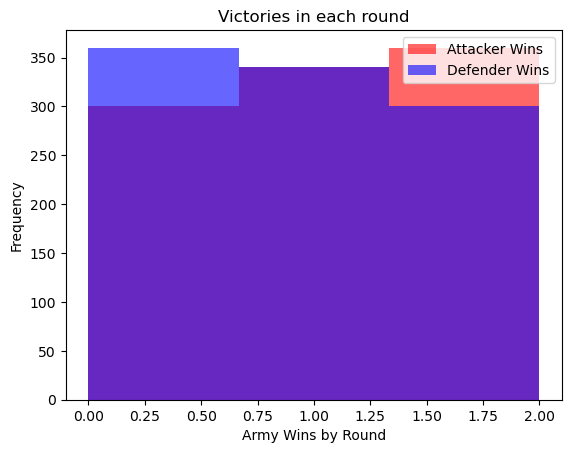

In [77]:


# Simulate one battle round between the attacker and defender.
def round():
    attacker = np.sort(np.random.randint(1, 7, 3))[::-1] # generate 3 integers between 1 and 6 / sort these 3 numbers in ascending order and -1 will change to descending
    defender = np.sort(np.random.randint(1, 7, 2))[::-1]

    atta_wins = 0 # counts the number of victories in each round
    def_wins = 0

    # Pair the first dice from both the attacker and defender, then the second dice, and so on.
    # Inside the loop, the attacker’s dice (attack) and the defender’s dice (defend) are compared.
    for attack, defend in zip(attacker, defender): # corresponding values
        if attack > defend:
            atta_wins += 1
        else:
            def_wins += 1
    
    return dict(
        attacker = attacker,
        defender = defender,
        attacker_wins = atta_wins,
        defender_wins = def_wins
    )

# This loop runs the round() function 1000 times.
# Prints the full result of each battle round (dice rolls and wins).
# Each time the round is simulated, the result is printed, showing the dice rolls and the wins for both sides

for i in range(1, 1000):
   res = round()
   print(res)

# This second loop runs two empty lists to store the number of wins for the attacker and defender across 1000 rounds
atta_wins = []
def_wins = []

for i in range(1000):
    res = round()
    atta_wins.append(res['attacker_wins'])
    def_wins.append(res['defender_wins'])



plt.hist(atta_wins, bins=3, alpha=0.6, label='Attacker Wins', color='red')
plt.hist(def_wins, bins=3, alpha=0.6, label='Defender Wins', color='blue')
plt.xlabel("Army Wins by Round")
plt.ylabel("Frequency")
plt.legend()
plt.title("Victories in each round")
plt.savefig('victories_each_round.png')
plt.show()


END
*******************